# Image Project
## Notebook Summary
-Insert-

An in-depth look at the data can be found at:
https://www.cs.toronto.edu/~kriz/cifar.html

##These are the steps we will follow in this notebook.
###1.Import Necessary Libraries (James)
###2.Read In the Data Files (James)
###3.Organize the Data(James)
###4. Build our Neural Network Model(Daniel)
###5.Test Model on the Test Data(Daniel)
###6.Graph the Data(Daniel)
###7.Make Adjustments if Necessary(Both)



#Step 1: Import the necessary libraries

In [ ]:
#Import the pandas library
import pandas as pd

#Import the numpy library
import numpy as np

#Import in keras and modules
import keras
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10

#Import data visualization library
import matplotlib.pyplot as plt

#Import libraries from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Step 2.Read in the data file

In [ ]:
#We imported the cifar10 dataset from keras
#Split it into your train and test as well as images and labels.
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#Lets look at the train_images array to get an idea.
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

#Step 3. Organize the Data

In [ ]:
#We want to reshape the arrays to ensure they will have the same input shape for our model.
train_images = train_images.reshape((50000, 32, 32,3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,32, 32,3))
test_images = test_images.astype('float32') / 255

In [ ]:
#Convert the labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#Step 4. Build the Model

In [ ]:
#Build the CNN Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())

# TO DO
# ADD A 64 NODE DENSE LAYER WITH ACTIVATION RELU
model.add(layers.Dense(64,activation='relu'))

# ADD CLASSIFICATION LAYER ACTIVATION SOFTMAX
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
#View our Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
#Compile the Model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Fit that model bro.
history = model.fit(
          train_images,
          train_labels,
          epochs=5,
          batch_size=64,
          validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 51s 81ms/step - loss: 1.6835 - accuracy: 0.3907 - val_loss: 1.4455 - val_accuracy: 0.4797
Epoch 2/5
625/625 [==============================] - 51s 82ms/step - loss: 1.3078 - accuracy: 0.5372 - val_loss: 1.2446 - val_accuracy: 0.5529
Epoch 3/5
625/625 [==============================] - 51s 81ms/step - loss: 1.1217 - accuracy: 0.6078 - val_loss: 1.1026 - val_accuracy: 0.6094
Epoch 4/5
625/625 [==============================] - 51s 81ms/step - loss: 0.9978 - accuracy: 0.6506 - val_loss: 0.9966 - val_accuracy: 0.6514
Epoch 5/5
625/625 [==============================] - 50s 81ms/step - loss: 0.9052 - accuracy: 0.6836 - val_loss: 0.9534 - val_accuracy: 0.6717


#Step 5. Test model on Test Data

In [ ]:
#Test against the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 4s 13ms/step - loss: 0.9393 - accuracy: 0.6754


0.6754000186920166

#Step 6. Graph the Model Accuracy and Loss

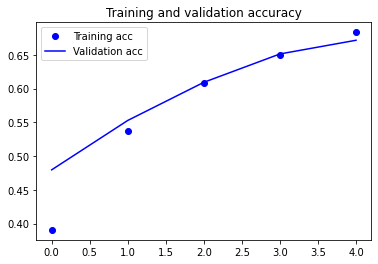

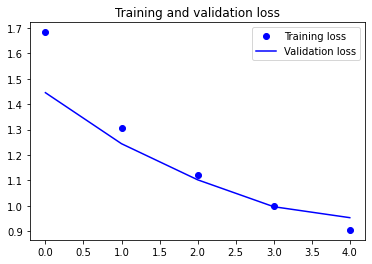

In [ ]:
#Create the plot to measure Training Accuracy and Validation Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Step 7. Make Necessary Adjustments

In [ ]:
#Decided to simply up the epochs
history = model.fit(
          train_images,
          train_labels,
          epochs=10,
          batch_size=64,
          validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 51s 81ms/step - loss: 1.6815 - accuracy: 0.3897 - val_loss: 1.3836 - val_accuracy: 0.4993
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 1.2963 - accuracy: 0.5393 - val_loss: 1.1814 - val_accuracy: 0.5896
Epoch 3/10
625/625 [==============================] - 49s 78ms/step - loss: 1.1116 - accuracy: 0.6110 - val_loss: 1.0416 - val_accuracy: 0.6370
Epoch 4/10
625/625 [==============================] - 49s 79ms/step - loss: 0.9914 - accuracy: 0.6543 - val_loss: 0.9764 - val_accuracy: 0.6615
Epoch 5/10
625/625 [==============================] - 50s 81ms/step - loss: 0.8919 - accuracy: 0.6896 - val_loss: 0.8998 - val_accuracy: 0.6936
Epoch 6/10
625/625 [==============================] - 49s 79ms/step - loss: 0.8226 - accuracy: 0.7133 - val_loss: 0.9074 - val_accuracy: 0.6862
Epoch 7/10
625/625 [==============================] - 48s 77ms/step - loss: 0.7558 - accuracy: 0.7350 - val_loss: 0.9094 - val_accuracy:

In [ ]:
#Test against the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 4s 14ms/step - loss: 0.9504 - accuracy: 0.6950


0.6949999928474426

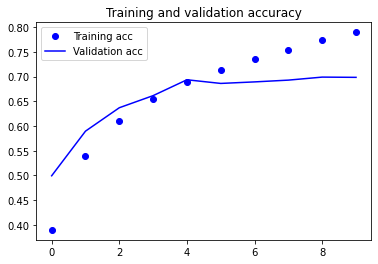

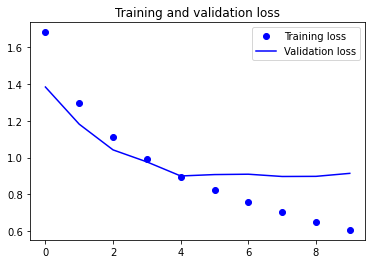

In [ ]:
#Create the plot to measure Training Accuracy and Validation Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()